In [10]:
# This file is ran on Kaggle Notebook
from gensim.models import KeyedVectors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('../input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin', binary=True)

In [8]:
lst = model.most_similar(positive=['camera'],topn=10)
print(lst)

[('cameras', 0.8131938576698303), ('Wagging_finger', 0.7311819791793823), ('camera_lens', 0.7250816226005554), ('camcorder', 0.7037475109100342), ('Camera', 0.6848660111427307), ('Canon_digital_SLR', 0.6474252343177795), ('Cameras', 0.6350969672203064), ('Nikon_D####_digital_SLR', 0.6259366273880005), ('tripod', 0.6189838647842407), ('EyeToy_USB', 0.6173486709594727)]


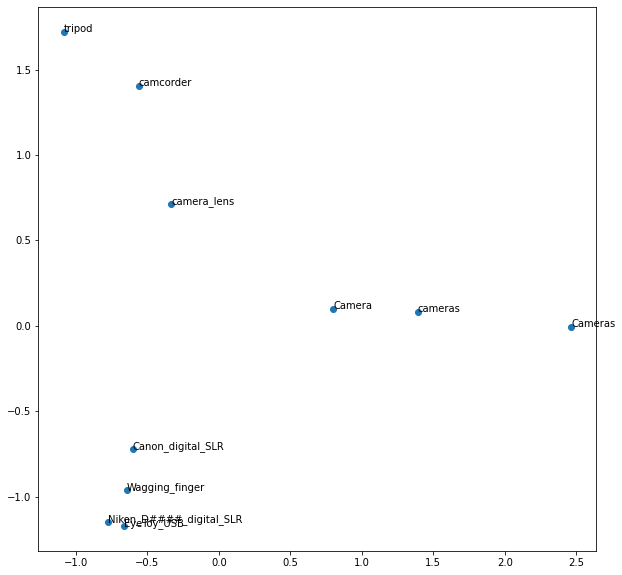

In [11]:
close_words = []
close_vecs = []
for p in lst:
    close_words.append(p[0])
    close_vecs.append(model[p[0]])

df = pd.DataFrame(close_vecs)
pca = PCA(n_components = 2)
close_vecs = pca.fit_transform(close_vecs)

plt.figure(figsize=(10,10))
plt.scatter(close_vecs[:,0], close_vecs[:,1])
for word, (x,y) in zip(close_words, close_vecs):
    plt.text(x, y, word)
plt.show()

In [12]:
print(close_words)

['cameras', 'Wagging_finger', 'camera_lens', 'camcorder', 'Camera', 'Canon_digital_SLR', 'Cameras', 'Nikon_D####_digital_SLR', 'tripod', 'EyeToy_USB']
